# Midterm: Regression
## Instructions
### Use the `diamonds` dataset available in the seaborn library to train a regression algorithm of your choice. Make sure to perform all the preprocessing steps. Use the regression model to predict the price of a diamond with the following characteristics:

* Carat: 0.25	
* cut: Premium
* color: J
* depth: 56.7
* table: 57.0
* x: 4.01
* y: 4.05
* z: 2.35

### Start
1) set data - web, api
2) visualize - sns, matplot
3) clean - pd function
4) feature engineering - OneHotEncoding, scaler
5) model - Forest, KNN, linear regression
6) validate - MSE / RMSE (you want these to be lower), other metrics...
7) predict

## Prepare the Data for Regression Problems

In [102]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns

#get dataset names from the seaborn library
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [103]:
# importing the tips dataset
diamonds_df = sns.load_dataset("diamonds")

#printing dataset header
diamonds_df.head(53940)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='cut', ylabel='price'>

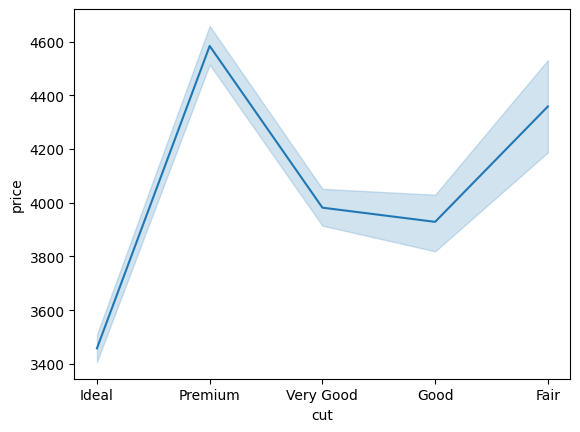

In [104]:
# Visualize price distribution
sns.lineplot(data=diamonds_df, x="cut", y="price")

<Axes: xlabel='cut', ylabel='price'>

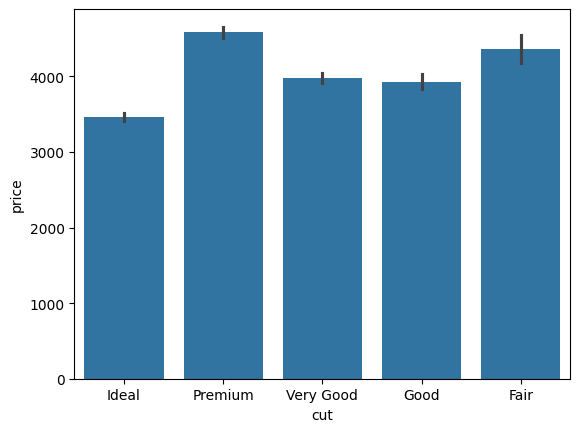

In [105]:
# Visualize average price per cut
sns.barplot(data=diamonds_df, x="cut", y="price")

## Divide Data into Features and Labels

In [106]:
#extracting features
X = diamonds_df.drop(['price', 'clarity'], axis=1)

#extracting labels
y = diamonds_df["price"]

In [107]:
#printing features
X.head()

,carat,cut,color,depth,table,x,y,z
0,0.23,Ideal,E,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,63.3,58.0,4.34,4.35,2.75


In [108]:
#print the labels 
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

## Convert Categorical Data into Numbers

In [109]:
#removing categorical features
numerical = X.drop(['cut', 'color'], axis = 1)

#print numeric features only
numerical.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [110]:
#filter categorical features
categorical = X.filter(['cut', 'color'])

#print categorical features header
categorical.head()

,cut,color
0,Ideal,E
1,Premium,E
2,Good,E
3,Premium,I
4,Good,J


In [111]:
#perform one-hot encoding
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J
0,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False
2,False,False,True,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False,True


In [112]:
#concatenate numeric and one hot-encoded features

X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,False,False,True,False,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,True,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,False,True,False,True,False,False,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,True,False,False,False,False,False,False,False,True,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,True,False,False,False,False,False,False,True


In [113]:
# Rename cut_Very Good to cut_Very_Good
X = X.rename(columns = {'cut_Very Good': 'cut_Very_Good'})

In [114]:
# Convert True/False to 1/0
X.cut_Premium = X.cut_Premium.replace({True: 1, False: 0})
X.cut_Very_Good = X.cut_Very_Good.replace({True: 1, False: 0})
X.cut_Good = X.cut_Good.replace({True: 1, False: 0})
X.cut_Fair = X.cut_Fair.replace({True: 1, False: 0})

# Color aswell
X.color_E = X.color_E.replace({True: 1, False: 0})
X.color_F = X.color_F.replace({True: 1, False: 0})
X.color_G = X.color_G.replace({True: 1, False: 0})
X.color_H = X.color_H.replace({True: 1, False: 0})
X.color_I = X.color_I.replace({True: 1, False: 0})
X.color_J = X.color_J.replace({True: 1, False: 0})


X.head()

C:\Users\cesth\AppData\Local\Temp\ipykernel_22304\861411212.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.cut_Premium = X.cut_Premium.replace({True: 1, False: 0})
C:\Users\cesth\AppData\Local\Temp\ipykernel_22304\861411212.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.cut_Very_Good = X.cut_Very_Good.replace({True: 1, False: 0})
C:\Users\cesth\AppData\Local\Temp\ipykernel_22304\861411212.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

,carat,depth,table,x,y,z,cut_Premium,cut_Very_Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,1,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,1,0,1,0,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,1,0,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,1,0,0,0,0,0,0,1


## Divide Data into Training and Test Datasets

In [115]:
# divide data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Data Scaling / Normalization

In [116]:
# feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

## Random Forest Regression

In [117]:
# Import Random Forest Algorithm from SKlearn
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the performance of the model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 651.597579166446
Mean Squared Error: 1444136.0053746474
Root Mean Squared Error: 1201.7220998944172


##### The numbers are off because a category is missing (Clarity)

## Predicting a Single Value

### Use the `diamonds` dataset to train a random forest regression algorithm. Predict the price of a diamond with the following characteristics:

* `Carat`: 0.25	
* `cut`: Premium
* `color`: J
* `depth`: 56.7
* `table`: 57.0
* `x`: 4.01
* `y`: 4.05
* `z`: 2.35

In [118]:
# Convert the input into a dataframe

single_input = {"carat":[0.25], "cut":["Premium"], "color":["J"], 
                "depth":[56.7], "table":[57.0], 
                "x":[4.01], "y":[4.05], "z":[2.35]}

single_input = pd.DataFrame(single_input)
single_input

,carat,cut,color,depth,table,x,y,z
0,0.25,Premium,J,56.7,57.0,4.01,4.05,2.35


In [119]:
updated_diamonds_df = pd.concat([X, single_input], ignore_index=True)
updated_diamonds_df

,carat,depth,table,x,y,z,cut_Premium,cut_Very_Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J,cut,color
0,0.23,61.5,55.0,3.95,3.98,2.43,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.21,59.8,61.0,3.89,3.84,2.31,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.23,56.9,65.0,4.05,4.07,2.31,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.29,62.4,58.0,4.20,4.23,2.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
4,0.31,63.3,58.0,4.34,4.35,2.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,63.1,55.0,5.69,5.75,3.61,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
53937,0.70,62.8,60.0,5.66,5.68,3.56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
53938,0.86,61.0,58.0,6.15,6.12,3.74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
53939,0.75,62.2,55.0,5.83,5.87,3.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [121]:
# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit the StandardScaler to your training data
X_train_scaled = sc.fit_transform(X_train)

# Use the fitted StandardScaler to transform both training and test data
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)


# import random forest regressor from sklearn
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

#training the algorithm on training set
regressor = rf_reg.fit(X_train, y_train)

#making predictions on the 43940th record from the dataset
single_record = sc.transform (X.values[43939].reshape(1, -1))
predicted_diamonds = regressor.predict(single_record)

#printing the predicted value
print(predicted_diamonds)